In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("../input/india-loksabha-elections-data19622019/Loksabha_1962-2019 .csv")

### Exploratory data analysis

In [3]:
df.head()

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
0,Adilabad,36,GEN,Andhra Pradesh,G. Narayan Reddy,Indian National Congress,"4,04,283","2,20,383",54.5 %,"89,085",40.40%,1962.0
1,Adoni,27,GEN,Andhra Pradesh,Pendekanti Venkatasubbaiah,Indian National Congress,"4,19,077","2,52,379",60.2 %,"33,022",13.10%,1962.0
2,Agra,433,GEN,Uttar Pradesh [1947 - 1999],Seth Achal Singh,Indian National Congress,"4,33,164","2,75,663",63.6 %,"54,351",19.70%,1962.0
3,Ahmedabad,120,GEN,Gujarat,Indulal Kanaiyalal Yagnik,Nutan Maha Gujarat Janta Parisha,"4,33,392","2,70,346",62.4 %,"21,592",8.00%,1962.0
4,Ahmednagar,245,GEN,Maharashtra,Motilal Kundanmal Firodya,Indian National Congress,"4,03,913","2,22,091",55.0 %,"14,038",6.30%,1962.0


In [4]:
df.shape

(8047, 12)

<AxesSubplot:>

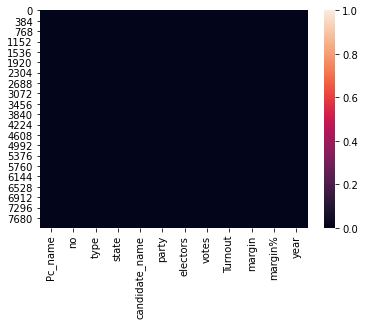

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()

Pc_name            0
no                 0
type              32
state              0
candidate_name     0
party              0
electors           0
votes              0
Turnout           14
margin             0
margin%           15
year               1
dtype: int64

only few NUll data to remove

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pc_name         8047 non-null   object 
 1   no              8047 non-null   object 
 2   type            8015 non-null   object 
 3   state           8047 non-null   object 
 4   candidate_name  8047 non-null   object 
 5   party           8047 non-null   object 
 6   electors        8047 non-null   object 
 7   votes           8047 non-null   object 
 8   Turnout         8033 non-null   object 
 9   margin          8047 non-null   object 
 10  margin%         8032 non-null   object 
 11  year            8046 non-null   float64
dtypes: float64(1), object(11)
memory usage: 754.5+ KB


Here we can see most of the features are mentioned as Object which is a categorical feature, but we know columns like electors,	votes,	Turnout,	margin,	margin% are in the from of integers

In [8]:
#Handling Categorical Null values
df['type'] = df['type'].fillna(df['type'].mode()[0])

Null values are dropped here

In [9]:
pd.set_option('display.max_rows',500)

to display maximum rows in the output 

we know some of the numerical features are mentioned as objects.first removing the punctuations and changing the type as float for all the columns one by one

In [10]:
#removing punctuation
df['electors'] = df['electors'].str.replace(',',"")
df['electors'] = df['electors'].str.replace('-',"0")
df['electors'] = df['electors'].astype('float',errors='ignore')

In [11]:
df['votes'] = df['votes'].str.replace(',',"")
df['votes'] = df['votes'].str.replace('-',"")
df['votes'] = pd.to_numeric(df['votes'],errors='coerce')

In [12]:
df['Turnout'] = df['Turnout'].str.replace('%',"")
df['Turnout'] = df['Turnout'].str.replace('-',"")
df['Turnout'] = pd.to_numeric(df['Turnout'],errors='coerce')

In [13]:
df['margin'] = df['margin'].str.replace(',',"")
df['margin'] = df['margin'].str.replace('-',"")
df['margin'] = pd.to_numeric(df['margin'],errors='coerce')

In [14]:
df['margin%'] = df['margin%'].str.replace('%',"")
df['margin%'] = df['margin%'].str.replace('-',"")
df['margin%'] = pd.to_numeric(df['margin%'],errors='coerce')

In [15]:
df.head()

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
0,Adilabad,36,GEN,Andhra Pradesh,G. Narayan Reddy,Indian National Congress,404283,220383.0,54.5,89085.0,40.4,1962.0
1,Adoni,27,GEN,Andhra Pradesh,Pendekanti Venkatasubbaiah,Indian National Congress,419077,252379.0,60.2,33022.0,13.1,1962.0
2,Agra,433,GEN,Uttar Pradesh [1947 - 1999],Seth Achal Singh,Indian National Congress,433164,275663.0,63.6,54351.0,19.7,1962.0
3,Ahmedabad,120,GEN,Gujarat,Indulal Kanaiyalal Yagnik,Nutan Maha Gujarat Janta Parisha,433392,270346.0,62.4,21592.0,8.0,1962.0
4,Ahmednagar,245,GEN,Maharashtra,Motilal Kundanmal Firodya,Indian National Congress,403913,222091.0,55.0,14038.0,6.3,1962.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pc_name         8047 non-null   object 
 1   no              8047 non-null   object 
 2   type            8047 non-null   object 
 3   state           8047 non-null   object 
 4   candidate_name  8047 non-null   object 
 5   party           8047 non-null   object 
 6   electors        8047 non-null   object 
 7   votes           7993 non-null   float64
 8   Turnout         7993 non-null   float64
 9   margin          7993 non-null   float64
 10  margin%         7993 non-null   float64
 11  year            8046 non-null   float64
dtypes: float64(5), object(7)
memory usage: 754.5+ KB


now we can see we changed the numerical values tofloat to analyse

In [17]:
df['electors'] = pd.to_numeric(df['electors'],errors='coerce')

In [18]:
df.head()

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
0,Adilabad,36,GEN,Andhra Pradesh,G. Narayan Reddy,Indian National Congress,404283.0,220383.0,54.5,89085.0,40.4,1962.0
1,Adoni,27,GEN,Andhra Pradesh,Pendekanti Venkatasubbaiah,Indian National Congress,419077.0,252379.0,60.2,33022.0,13.1,1962.0
2,Agra,433,GEN,Uttar Pradesh [1947 - 1999],Seth Achal Singh,Indian National Congress,433164.0,275663.0,63.6,54351.0,19.7,1962.0
3,Ahmedabad,120,GEN,Gujarat,Indulal Kanaiyalal Yagnik,Nutan Maha Gujarat Janta Parisha,433392.0,270346.0,62.4,21592.0,8.0,1962.0
4,Ahmednagar,245,GEN,Maharashtra,Motilal Kundanmal Firodya,Indian National Congress,403913.0,222091.0,55.0,14038.0,6.3,1962.0


In [19]:
df.isnull().sum()

Pc_name            0
no                 0
type               0
state              0
candidate_name     0
party              0
electors           1
votes             54
Turnout           54
margin            54
margin%           54
year               1
dtype: int64

In [20]:
# Removing Null values
df['electors'] = df['electors'].fillna(df['electors'].mean())
df['votes'] = df['votes'].fillna(df['votes'].mean())
df['Turnout'] = df['Turnout'].fillna(df['Turnout'].mean())
df['margin'] = df['margin'].fillna(df['margin'].mean())
df['margin%'] = df['margin%'].fillna(df['margin%'].mean())

<AxesSubplot:>

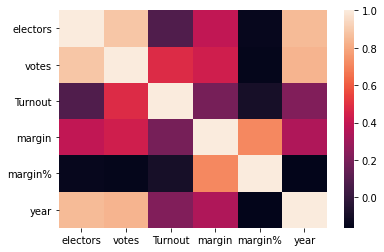

In [21]:
sns.heatmap(df.corr())

We can see  electors and votes are highly correlated with each other and year with (electors and votes are highly coorelated)

In [22]:
df.corr()


,electors,votes,Turnout,margin,margin%,year
electors,1.000000,0.882696,0.080821,0.389392,-0.142688,0.852197
votes,0.882696,1.000000,0.479201,0.436127,-0.151585,0.834956
Turnout,0.080821,0.479201,1.000000,0.189252,-0.092733,0.216107
margin,0.389392,0.436127,0.189252,1.000000,0.712210,0.339742
margin%,-0.142688,-0.151585,-0.092733,0.712210,1.000000,-0.162216
year,0.852197,0.834956,0.216107,0.339742,-0.162216,1.000000


<AxesSubplot:xlabel='electors', ylabel='votes'>

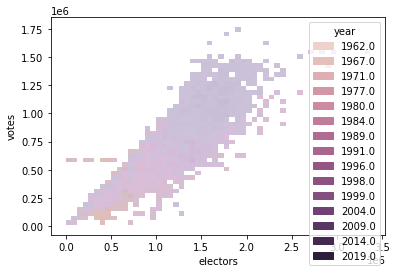

In [23]:
sns.histplot(data = df,x='electors',y='votes',hue='year',kde=True,legend=True)

It forms as liner cluster of points

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='electors', ylabel='Density'>

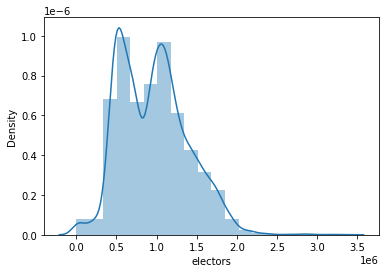

In [24]:
sns.distplot(df['electors'], bins=20)


we can see the distribution is  bi model and Having global maximum and two local maximum

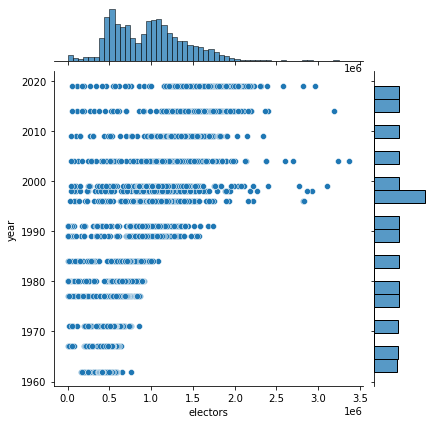

In [25]:
sns.jointplot(x='electors',y='year',data=df)

the overall electors votes graph forms a two bell curve which depicts its a bi model graph,having two peaks, but one global peak

We can see that in 1990 to 2000's the electors are maximum, lets analys more to get clear information

In [26]:
df['year'].value_counts()

1996.0    543
2004.0    543
1989.0    543
1999.0    543
2009.0    543
1980.0    543
1977.0    543
2014.0    543
1998.0    543
1984.0    543
1991.0    543
2019.0    541
1967.0    520
1971.0    518
1962.0    494
Name: year, dtype: int64

We can see that 543 constituency are formes after 1980

In [27]:
df12 = pd.DataFrame(df['state'].value_counts().index,columns=['states'])
df12

,states
0,Uttar Pradesh [1947 - 1999]
1,Maharashtra
2,West Bengal
3,Bihar [1947 - 1999]
4,Andhra Pradesh
5,Tamil Nadu
6,Madhya Pradesh [1947 - 1999]
7,Gujarat
8,Rajasthan
9,Karnataka


In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [29]:
# grouping to count the no of constituency votes for each states over the years
m =df.groupby(['year'],axis=0)['state'].value_counts()

In [30]:
years= sorted(df['year'].value_counts().index)
len(years)

15

In [31]:
for i in years:
    df12['state_'+str(i)] = df12['states'].map(m[i])

In [32]:
df12

,states,state_1962.0,state_1967.0,state_1971.0,state_1977.0,state_1980.0,state_1984.0,state_1989.0,state_1991.0,state_1996.0,state_1998.0,state_1999.0,state_2004.0,state_2009.0,state_2014.0,state_2019.0
0,Uttar Pradesh [1947 - 1999],86.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,NaN,NaN,NaN,NaN
1,Maharashtra,44.0,45.0,45.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0
2,West Bengal,36.0,40.0,40.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0
3,Bihar [1947 - 1999],53.0,53.0,53.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,NaN,NaN,NaN,NaN
4,Andhra Pradesh,43.0,41.0,41.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,NaN,NaN
5,Tamil Nadu,NaN,NaN,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,38.0
6,Madhya Pradesh [1947 - 1999],36.0,37.0,37.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,NaN,NaN,NaN,NaN
7,Gujarat,22.0,24.0,24.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0
8,Rajasthan,22.0,23.0,23.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
9,Karnataka,NaN,NaN,NaN,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0


In [33]:
df['year'].value_counts()

1996.0    543
2004.0    543
1989.0    543
1999.0    543
2009.0    543
1980.0    543
1977.0    543
2014.0    543
1998.0    543
1984.0    543
1991.0    543
2019.0    541
1967.0    520
1971.0    518
1962.0    494
Name: year, dtype: int64

WE can see that UP and Bihar has more constituency from 1962.therefore it shares (543/80) which is 14.73% of total constituency votes after the year 2000
15.65% before the year 2000

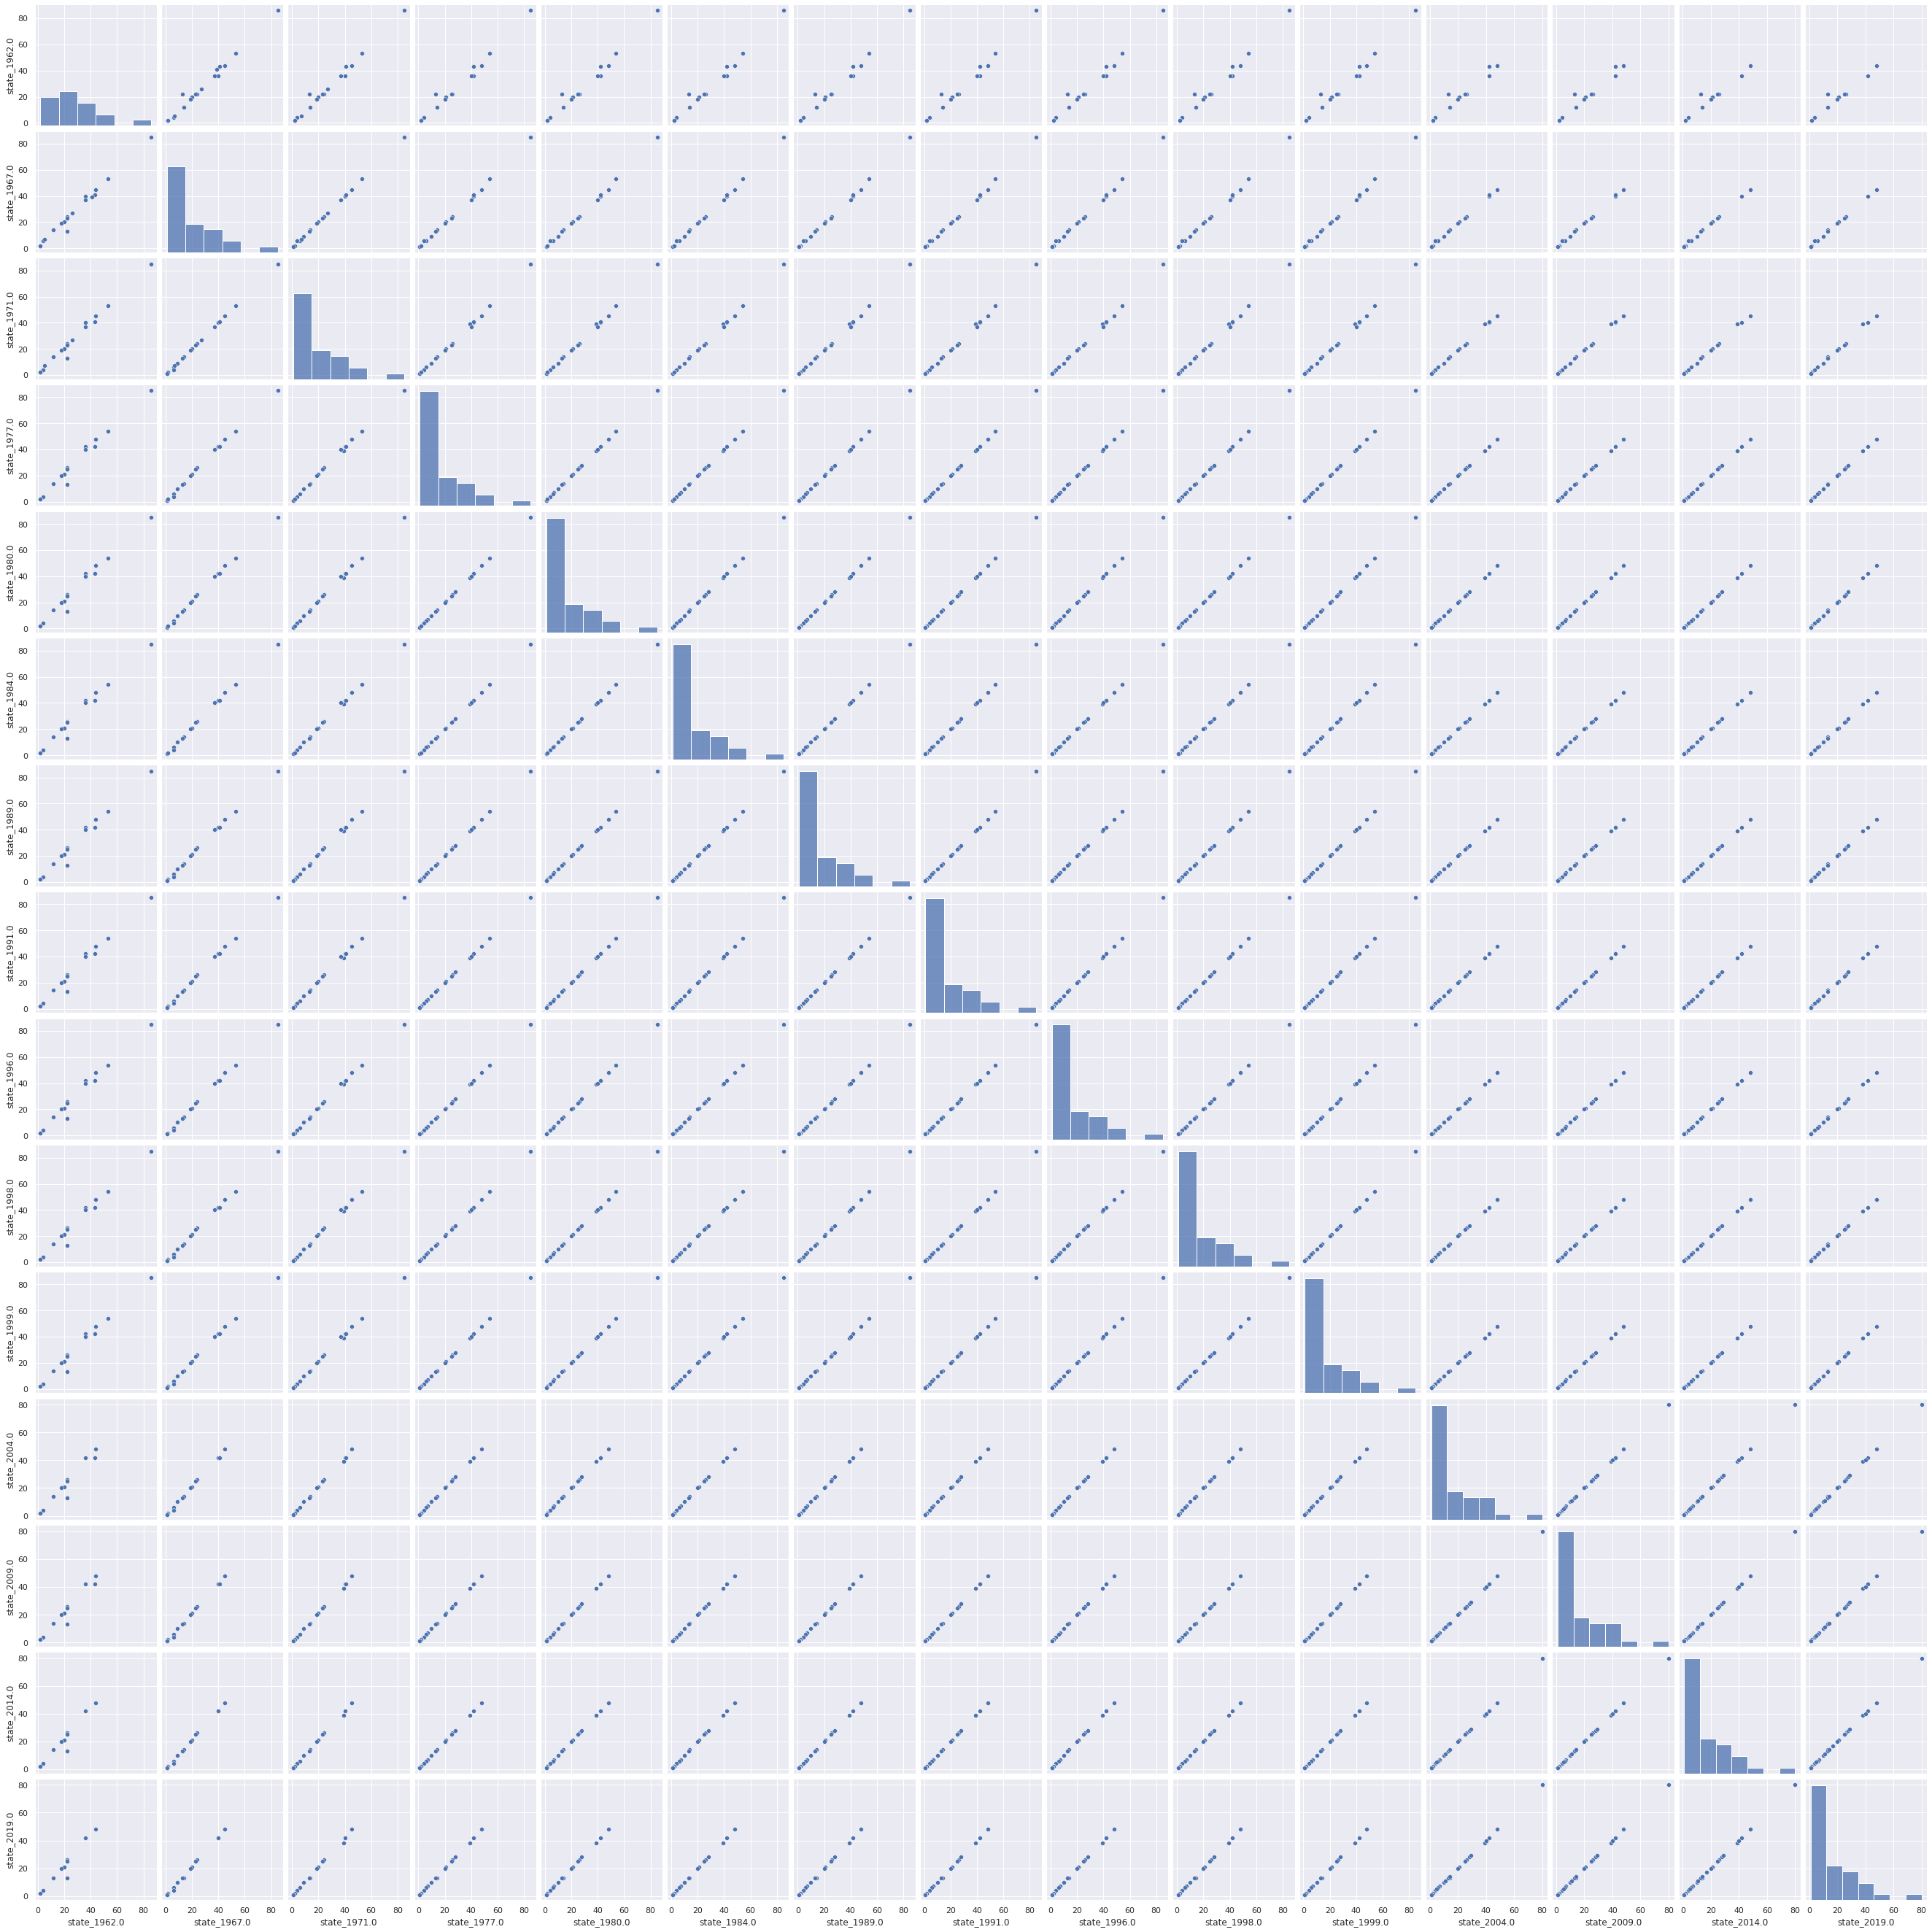

In [34]:
sns.pairplot(df12)

<AxesSubplot:xlabel='year', ylabel='count'>

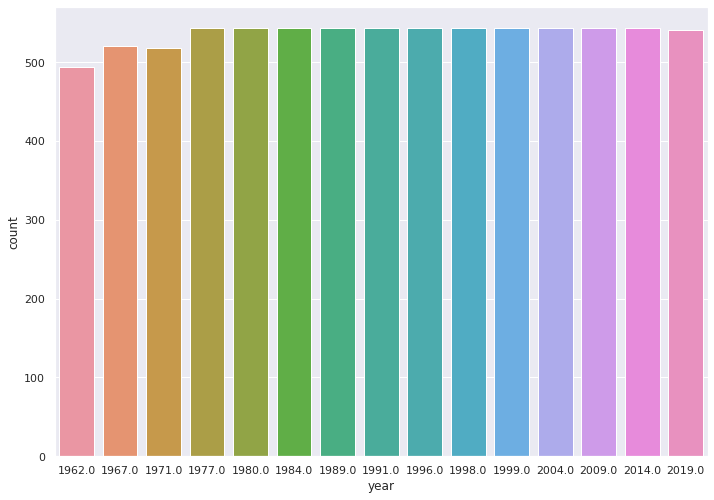

In [35]:
sns.countplot(x='year',data=df)

In [36]:
df.head()

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
0,Adilabad,36,GEN,Andhra Pradesh,G. Narayan Reddy,Indian National Congress,404283.0,220383.0,54.5,89085.0,40.4,1962.0
1,Adoni,27,GEN,Andhra Pradesh,Pendekanti Venkatasubbaiah,Indian National Congress,419077.0,252379.0,60.2,33022.0,13.1,1962.0
2,Agra,433,GEN,Uttar Pradesh [1947 - 1999],Seth Achal Singh,Indian National Congress,433164.0,275663.0,63.6,54351.0,19.7,1962.0
3,Ahmedabad,120,GEN,Gujarat,Indulal Kanaiyalal Yagnik,Nutan Maha Gujarat Janta Parisha,433392.0,270346.0,62.4,21592.0,8.0,1962.0
4,Ahmednagar,245,GEN,Maharashtra,Motilal Kundanmal Firodya,Indian National Congress,403913.0,222091.0,55.0,14038.0,6.3,1962.0


In [37]:
#total parties overall in indian constitution
len(df['party'].value_counts())


149

In [38]:
#parties having most seats in constituency based on year
par = df.groupby(['year'])['party'].value_counts()
par

year    party                                                   
1962.0  Indian National Congress                                    361
        Communist Party Of India                                     29
        Independent                                                  20
        Swatantra                                                    18
        Jan Sangh                                                    14
        Praja Socialist Party                                        12
        Dravida Munetra Kazhagam                                      7
        Socialist                                                     6
        Ganatantra Parishad                                           4
        Akali Dal                                                     3
        Jharkhand Party                                               3
        Republican Party                                              3
        Akhil Bharatiya Ram Rajya Parishad                            2

In [39]:
### lets create a dataframe having different parties and the constituency seat for each year
df_party = pd.DataFrame(df['party'].value_counts().index,columns=['party'])
years = sorted(df['year'].value_counts().index)
for i in years:
    df_party['parties_won_'+str(i)] = df_party['party'].map(par[i])


In [40]:
df_party

,party,parties_won_1962.0,parties_won_1967.0,parties_won_1971.0,parties_won_1977.0,parties_won_1980.0,parties_won_1984.0,parties_won_1989.0,parties_won_1991.0,parties_won_1996.0,parties_won_1998.0,parties_won_1999.0,parties_won_2004.0,parties_won_2009.0,parties_won_2014.0,parties_won_2019.0
0,Indian National Congress,361.0,283.0,352.0,154.0,NaN,415.0,197.0,244.0,140.0,141.0,114.0,145.0,206.0,44.0,52.0
1,Bharatiya Janta Party,NaN,NaN,NaN,NaN,NaN,2.0,85.0,120.0,161.0,182.0,182.0,138.0,116.0,282.0,302.0
2,Communist Party Of India (MARXIST),NaN,19.0,25.0,22.0,37.0,22.0,33.0,35.0,32.0,32.0,33.0,43.0,16.0,9.0,NaN
3,Indian National Congress (I),NaN,NaN,NaN,NaN,353.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bharatiya Lok Dal,NaN,NaN,NaN,295.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Janata Dal,NaN,NaN,NaN,NaN,NaN,NaN,143.0,59.0,46.0,6.0,NaN,NaN,NaN,NaN,NaN
6,Dravida Munetra Kazhagam,7.0,25.0,23.0,2.0,16.0,2.0,NaN,NaN,17.0,6.0,12.0,16.0,18.0,NaN,23.0
7,Communist Party Of India,29.0,23.0,23.0,7.0,10.0,6.0,12.0,14.0,12.0,9.0,4.0,10.0,4.0,1.0,2.0
8,Independent,20.0,35.0,14.0,9.0,9.0,13.0,12.0,1.0,9.0,6.0,6.0,5.0,9.0,3.0,4.0
9,Telugu Desam,NaN,NaN,NaN,NaN,NaN,30.0,2.0,13.0,16.0,12.0,29.0,5.0,6.0,16.0,3.0


Using the Dataframe we can find which party was having most number of constituancy in india for every years 

<AxesSubplot:xlabel='year', ylabel='votes'>

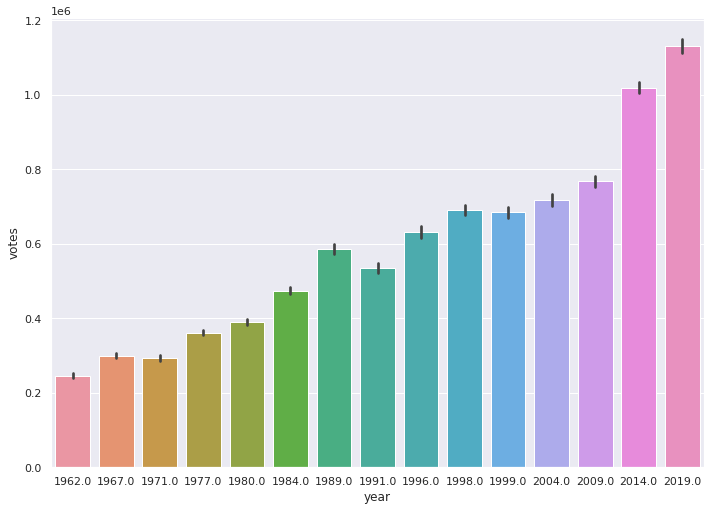

In [41]:
sns.barplot(x='year',y='votes',data=df)

In [42]:
max(df.groupby(['party'])['electors'].sum())


2290267812.0

<AxesSubplot:xlabel='year', ylabel='electors'>

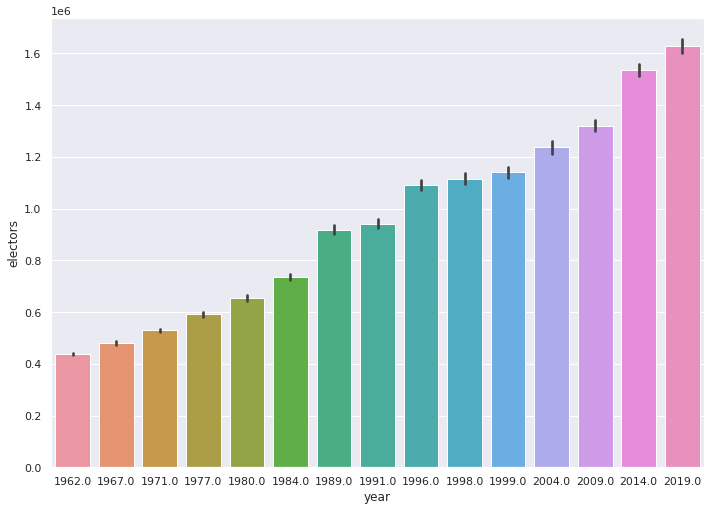

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='year',y='electors',data=df)

we can see the electors and votes by electors increased gradualy over years 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='votes', ylabel='Density'>

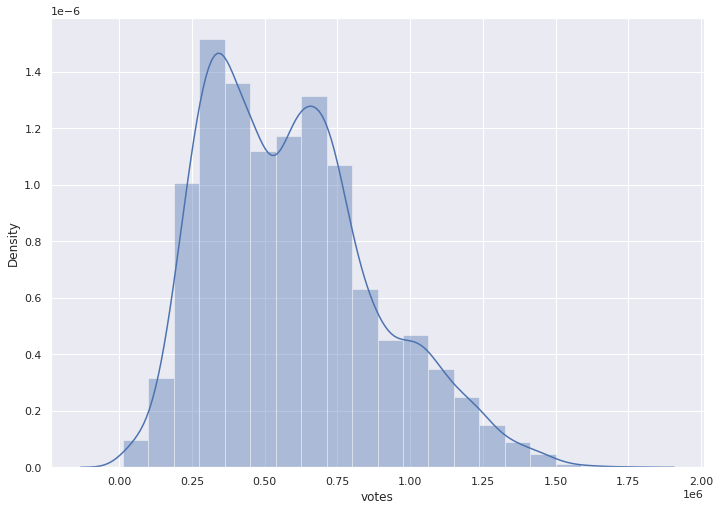

In [44]:
sns.distplot(df['votes'], bins=20)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='Turnout'>

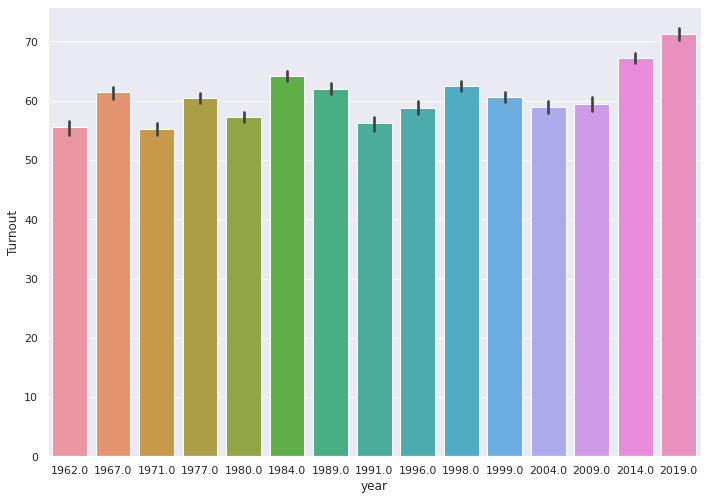

In [45]:
import matplotlib.pyplot as plt
sns.barplot(df['year'],df['Turnout'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Turnout', ylabel='state'>

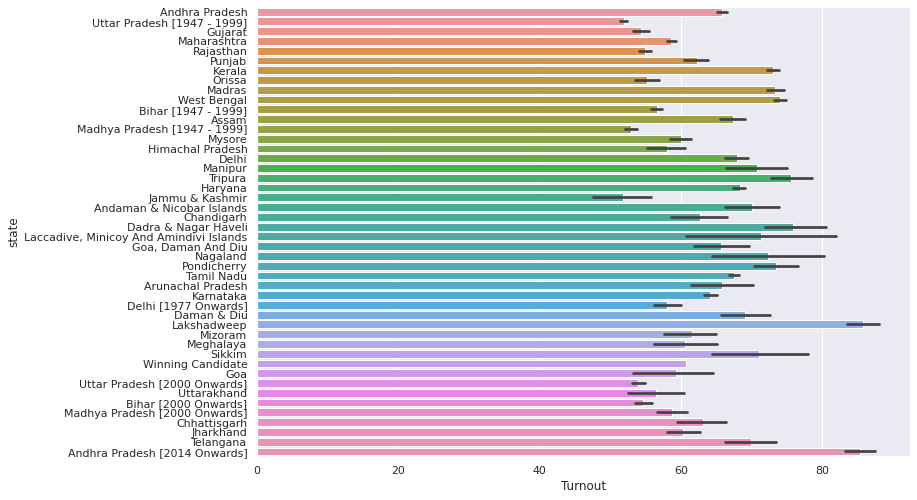

In [46]:
sns.barplot(df['Turnout'],df['state'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='margin%', ylabel='state'>

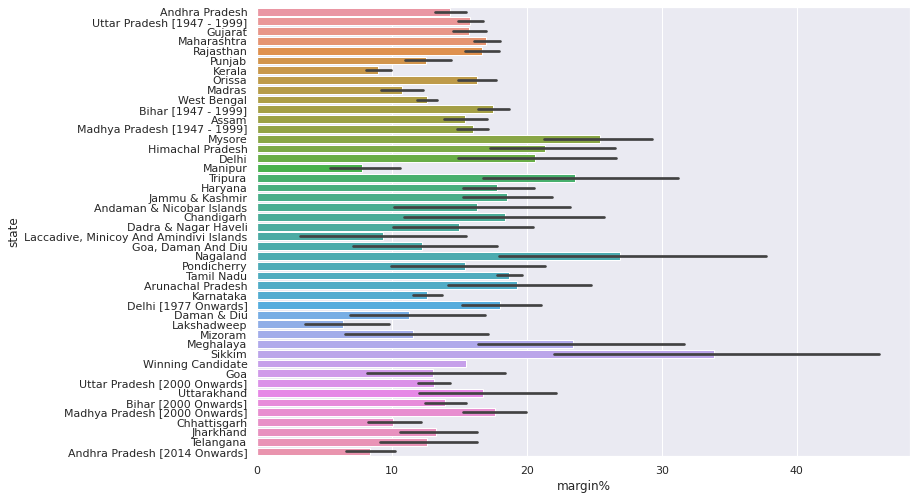

In [47]:
sns.barplot(df['margin%'],df['state'])

In [48]:
df['state'].value_counts()

Uttar Pradesh [1947 - 1999]                936
Maharashtra                                710
West Bengal                                620
Bihar [1947 - 1999]                        591
Andhra Pradesh                             545
Tamil Nadu                                 506
Madhya Pradesh [1947 - 1999]               430
Gujarat                                    382
Rajasthan                                  368
Karnataka                                  336
Uttar Pradesh [2000 Onwards]               320
Orissa                                     312
Kerala                                     296
Assam                                      207
Punjab                                     204
Bihar [2000 Onwards]                       160
Haryana                                    138
Madhya Pradesh [2000 Onwards]              116
Delhi [1977 Onwards]                        84
Jammu & Kashmir                             84
Mysore                                      80
Madras       

# Lets analyse Tamil Nadu constituency

In [49]:

pd.set_option('display.max_rows',500)

In [50]:
tn_consti = df.groupby(['state'])['Pc_name'].value_counts()
tn_consti

state                      Pc_name                    
Andaman & Nicobar Islands  Andaman & Nicobar Islands      10
                           Andaman And Nicobar Islands     2
                           A And N Islands                 1
                           Andaman Nicobar                 1
Andhra Pradesh             Adilabad                       13
                                                          ..
West Bengal                Kolkata Dakshi                  1
                           Maldaha Dakshi                  1
                           Midnapur                        1
                           Nebadwip                        1
Winning Candidate          No                              1
Name: Pc_name, Length: 1205, dtype: int64

In [51]:
tn_consti['Tamil Nadu'].index

Index(['Chidambaram', 'Coimbatore', 'Cuddalore', 'Dindigul', 'Karur',
       'Krishnagiri', 'Madurai', 'Nagapattinam', 'Nilgiris', 'Perambalur',
       'Pollachi', 'Ramanathapuram', 'Salem', 'Sivaganga', 'Sriperumbudur',
       'Tenkasi', 'Thanjavur', 'Tirunelveli', 'Arakkonam', 'Dharmapuri',
       'Tiruchirappalli', 'Vellore', 'Gobichettipalayam', 'Madras North',
       'Madras South', 'Nagercoil', 'Pudukkottai', 'Sivakasi', 'Tindivanam',
       'Tiruchendur', 'Tiruchengode', 'Tiruppattur', 'Chengalpattu',
       'Madras Central', 'Mayiladuturai', 'Palani', 'Periyakulam', 'Rasipuram',
       'Vandavasi', 'Kallakurichi', 'Arani', 'Chennai North', 'Chennai South',
       'Erode', 'Kancheepuram', 'Kanniyakumari', 'Mayiladuthurai', 'Namakkal',
       'Theni', 'Thiruvallur', 'Thoothukkudi', 'Tiruppur', 'Tiruvannamalai',
       'Viluppuram', 'Virudhunagar', 'Chennai Central', 'Wandiwash',
       'Chennai Centra', 'Chingleput', 'Dharapuram', 'Kumbakonam', 'Mayuram',
       'Mettur', 'Periak

#### No of people who are eligible to vote in each constituency of tamil nadu

In [52]:
elec = df.groupby(['Pc_name','year'])['electors'].sum()
elec

Pc_name          year  
A And N Islands  1971.0      63122.0
Adilabad         1962.0     404283.0
                 1967.0     465742.0
                 1971.0     514876.0
                 1977.0     548091.0
                             ...    
Yeotmal          1971.0     506705.0
                 1977.0     574977.0
Zahirabad        2009.0    1359566.0
                 2014.0    1445246.0
                 2019.0    1411026.0
Name: electors, Length: 7999, dtype: float64

In [53]:
years = sorted(df['year'].value_counts().index)

In [54]:
### lets create a dataframe having different parties and the constituency seat for each year
df_elec = pd.DataFrame(years,columns=['year'])
df_elec

,year
0,1962.0
1,1967.0
2,1971.0
3,1977.0
4,1980.0
5,1984.0
6,1989.0
7,1991.0
8,1996.0
9,1998.0


In [55]:
const = sorted(tn_consti['Tamil Nadu'].index)
for i in const:
    df_elec[str(i)] = df_elec['year'].map(elec[i])

In [56]:
df_elec

,year,Arakkonam,Arani,Chengalpattu,Chennai Centra,Chennai Central,Chennai North,Chennai South,Chidambaram,Chingleput,...,Tirunelveli,Tiruppattur,Tiruppur,Tiruttani,Tiruvannamalai,Vandavasi,Vellore,Viluppuram,Virudhunagar,Wandiwash
0,1962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,457267.0,429553.0,...,470895.0,453447.0,NaN,NaN,449968.0,NaN,434404.0,NaN,NaN,416676.0
1,1967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524610.0,538456.0,...,543945.0,NaN,NaN,538610.0,NaN,NaN,504140.0,NaN,NaN,523306.0
2,1971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,554449.0,580796.0,...,584445.0,516063.0,NaN,565715.0,NaN,NaN,559646.0,NaN,NaN,539245.0
3,1977.0,667308.0,NaN,630334.0,NaN,NaN,NaN,NaN,663634.0,NaN,...,672649.0,656520.0,NaN,NaN,NaN,NaN,659939.0,NaN,NaN,685987.0
4,1980.0,701433.0,NaN,673832.0,NaN,NaN,NaN,NaN,694357.0,NaN,...,702603.0,686891.0,NaN,NaN,NaN,714275.0,707512.0,NaN,NaN,NaN
5,1984.0,757665.0,NaN,737434.0,NaN,NaN,NaN,NaN,734012.0,NaN,...,757930.0,751122.0,NaN,NaN,NaN,763132.0,748776.0,NaN,NaN,NaN
6,1989.0,975104.0,NaN,957415.0,NaN,NaN,NaN,NaN,938462.0,NaN,...,970473.0,992148.0,NaN,NaN,NaN,978457.0,1011139.0,NaN,NaN,NaN
7,1991.0,968764.0,NaN,952050.0,NaN,NaN,NaN,NaN,933507.0,NaN,...,969816.0,985576.0,NaN,NaN,NaN,970805.0,1007812.0,NaN,NaN,NaN
8,1996.0,1034646.0,NaN,1043889.0,NaN,NaN,NaN,NaN,1026604.0,NaN,...,1023826.0,1061817.0,NaN,NaN,NaN,1031471.0,1050168.0,NaN,NaN,NaN
9,1998.0,1072687.0,NaN,1148117.0,NaN,NaN,NaN,NaN,1054642.0,NaN,...,1075467.0,1093701.0,NaN,NaN,NaN,1075770.0,1101216.0,NaN,NaN,NaN


<AxesSubplot:xlabel='year', ylabel='Arakkonam'>

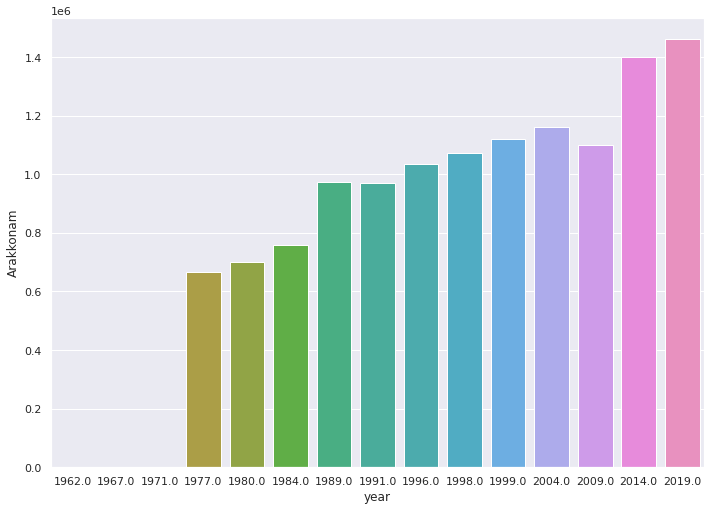

In [57]:
#Lets plot the number of people who actualy in voter list or elegible to vote in arakonam 
sns.barplot(x='year',y='Arakkonam',data=df_elec)

we can see it was improved over years

Similarly we can alalyse for each constituency 

lets analyse for total tamilnadu over years

In [58]:
df_elec['Tamil Nadu'] = df_elec.iloc[:,1:].sum(axis=1)

In [59]:
TN_electors_eligi = df_elec['Tamil Nadu']

<AxesSubplot:xlabel='year', ylabel='Tamil Nadu'>

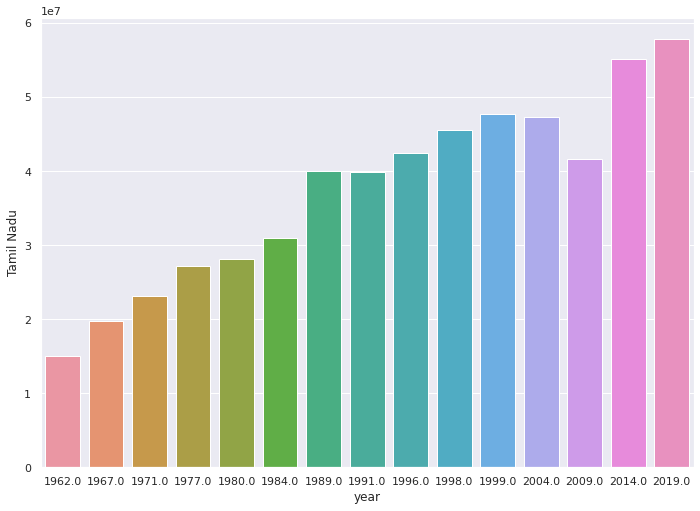

In [60]:
sns.barplot(x='year',y='Tamil Nadu',data=df_elec)

We can see in 2009 the elegibility of the person to vote got reduced more

#### Lets plot people who voted for the party to win

In [61]:
df.head()

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
0,Adilabad,36,GEN,Andhra Pradesh,G. Narayan Reddy,Indian National Congress,404283.0,220383.0,54.5,89085.0,40.4,1962.0
1,Adoni,27,GEN,Andhra Pradesh,Pendekanti Venkatasubbaiah,Indian National Congress,419077.0,252379.0,60.2,33022.0,13.1,1962.0
2,Agra,433,GEN,Uttar Pradesh [1947 - 1999],Seth Achal Singh,Indian National Congress,433164.0,275663.0,63.6,54351.0,19.7,1962.0
3,Ahmedabad,120,GEN,Gujarat,Indulal Kanaiyalal Yagnik,Nutan Maha Gujarat Janta Parisha,433392.0,270346.0,62.4,21592.0,8.0,1962.0
4,Ahmednagar,245,GEN,Maharashtra,Motilal Kundanmal Firodya,Indian National Congress,403913.0,222091.0,55.0,14038.0,6.3,1962.0


In [62]:
vote = df.groupby(['Pc_name','year'])['votes'].sum()
vote

Pc_name          year  
A And N Islands  1971.0      44531.0
Adilabad         1962.0     220383.0
                 1967.0     284595.0
                 1971.0     303280.0
                 1977.0     310466.0
                             ...    
Yeotmal          1971.0     392805.0
                 1977.0     401020.0
Zahirabad        2009.0    1021137.0
                 2014.0    1094806.0
                 2019.0    1044365.0
Name: votes, Length: 7999, dtype: float64

In [63]:
years

[1962.0,
 1967.0,
 1971.0,
 1977.0,
 1980.0,
 1984.0,
 1989.0,
 1991.0,
 1996.0,
 1998.0,
 1999.0,
 2004.0,
 2009.0,
 2014.0,
 2019.0]

In [64]:
tn_consti['Tamil Nadu'].index

Index(['Chidambaram', 'Coimbatore', 'Cuddalore', 'Dindigul', 'Karur',
       'Krishnagiri', 'Madurai', 'Nagapattinam', 'Nilgiris', 'Perambalur',
       'Pollachi', 'Ramanathapuram', 'Salem', 'Sivaganga', 'Sriperumbudur',
       'Tenkasi', 'Thanjavur', 'Tirunelveli', 'Arakkonam', 'Dharmapuri',
       'Tiruchirappalli', 'Vellore', 'Gobichettipalayam', 'Madras North',
       'Madras South', 'Nagercoil', 'Pudukkottai', 'Sivakasi', 'Tindivanam',
       'Tiruchendur', 'Tiruchengode', 'Tiruppattur', 'Chengalpattu',
       'Madras Central', 'Mayiladuturai', 'Palani', 'Periyakulam', 'Rasipuram',
       'Vandavasi', 'Kallakurichi', 'Arani', 'Chennai North', 'Chennai South',
       'Erode', 'Kancheepuram', 'Kanniyakumari', 'Mayiladuthurai', 'Namakkal',
       'Theni', 'Thiruvallur', 'Thoothukkudi', 'Tiruppur', 'Tiruvannamalai',
       'Viluppuram', 'Virudhunagar', 'Chennai Central', 'Wandiwash',
       'Chennai Centra', 'Chingleput', 'Dharapuram', 'Kumbakonam', 'Mayuram',
       'Mettur', 'Periak

In [65]:
df_voters = pd.DataFrame(years,columns=['year'])

In [66]:
for i in tn_consti['Tamil Nadu'].index:
    df_voters[str(i)] = df_voters['year'].map(vote[i]) 

In [67]:
df_voters

,year,Chidambaram,Coimbatore,Cuddalore,Dindigul,Karur,Krishnagiri,Madurai,Nagapattinam,Nilgiris,...,Wandiwash,Chennai Centra,Chingleput,Dharapuram,Kumbakonam,Mayuram,Mettur,Periakulam,Tiruchirappall,Tiruttani
0,1962.0,327065.0,398104.0,324795.0,331580.0,296273.0,270916.0,364659.0,361753.0,322235.0,...,294837.0,NaN,332465.0,NaN,339435.0,338225.0,NaN,NaN,NaN,NaN
1,1967.0,403331.0,427419.0,416423.0,428095.0,408382.0,336999.0,446802.0,403971.0,363063.0,...,403205.0,NaN,431101.0,428401.0,440213.0,383119.0,358490.0,NaN,NaN,422500.0
2,1971.0,410311.0,426188.0,442672.0,439408.0,422396.0,356423.0,468822.0,416846.0,385628.0,...,411640.0,NaN,433934.0,416568.0,457883.0,399879.0,351437.0,418710.0,NaN,420590.0
3,1977.0,459817.0,523180.0,429893.0,483612.0,517913.0,349648.0,489074.0,523928.0,444544.0,...,470355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1980.0,487049.0,518780.0,454244.0,481438.0,514544.0,362269.0,533277.0,553290.0,488097.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1984.0,565913.0,643831.0,565944.0,579576.0,631922.0,503872.0,607638.0,621914.0,594471.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1989.0,670801.0,762404.0,666457.0,654944.0,748242.0,607181.0,719677.0,700948.0,751196.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1991.0,648403.0,717507.0,651048.0,637229.0,705045.0,611500.0,646431.0,677334.0,686963.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1996.0,725700.0,848217.0,729417.0,725466.0,763924.0,715036.0,747383.0,727883.0,796437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1998.0,684155.0,826652.0,658340.0,611642.0,676450.0,648144.0,676204.0,661129.0,718202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year', ylabel='Chidambaram'>

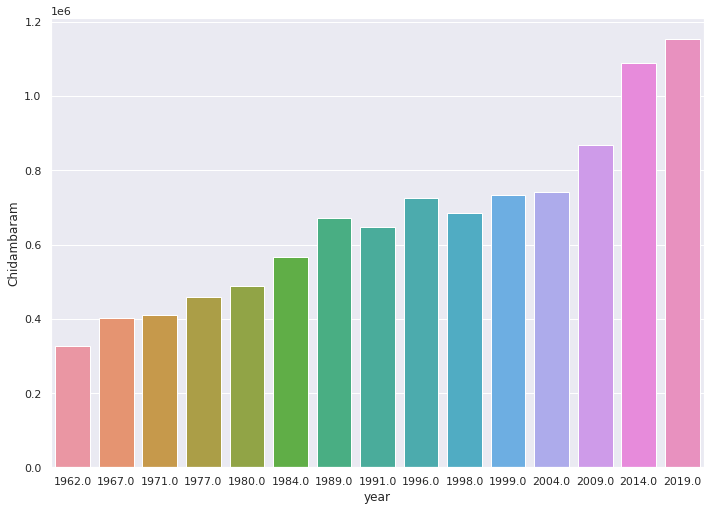

In [68]:
#for chidambaram constituency lets plot how many percentage of voters voted
sns.barplot(x='year',y='Chidambaram',data=df_voters)

Similarly we can see the people voted for the different constituency

In [69]:
voters = df.groupby(['state','party','year'])['votes'].sum()

In [70]:
voters

state                      party                           year  
Andaman & Nicobar Islands  Bharatiya Janta Party           1999.0     147102.0
                                                           2009.0     170107.0
                                                           2014.0     190328.0
                           Indian National Congress        1967.0      36924.0
                                                           1971.0      44531.0
                                                                       ...    
West Bengal                Revolutionary Socialist Party   1999.0    2444933.0
                                                           2004.0    2564814.0
                                                           2009.0    1810977.0
                           Samyukta Socialist Party        1967.0     255556.0
                           West Bengal Trinamool Congress  1998.0    6179978.0
Name: votes, Length: 1271, dtype: float64

In [71]:
voters['Tamil Nadu']

party                                     year  
All India Anna Dravida Munnetra Kazhagam  1977.0     7877528.0
                                          1980.0      951741.0
                                          1984.0     7037259.0
                                          1989.0     7632900.0
                                          1991.0     7357172.0
                                          1998.0    11835185.0
                                          1999.0     6731028.0
                                          2009.0     7132035.0
                                          2014.0    38528353.0
                                          2019.0     1173489.0
Bharatiya Janta Party                     1998.0     2192548.0
                                          1999.0     2941475.0
                                          2014.0      990742.0
Communist Party Of India                  1971.0     1700494.0
                                          1977.0     1538389.0
      

In [72]:
tn_party = df.groupby(['state'])['party'].value_counts()
tn_party['Tamil Nadu'].index

Index(['Dravida Munetra Kazhagam', 'Indian National Congress',
       'All India Anna Dravida Munnetra Kazhagam',
       'Tamil Maanila Congress (MOOPANAR)', 'Indian National Congress (I)',
       'Communist Party Of India', 'Pattali Makkal Katchi',
       'Marumalarchi Dravida Munnetra Kazhagam', 'Bharatiya Janta Party',
       'Communist Party Of India (MARXIST)',
       'Indian National Congress (ORGANISATION)', 'Independent',
       'Communist Party Of India (Marxist)', 'Viduthalai Chiruthaigal Katchi',
       'Forward Bloc', 'Indian Union Muslim League', 'Janta Party',
       'M.G.R.Anna D.M.Kazhagam'],
      dtype='object', name='party')

In [73]:
df_voters = pd.DataFrame(years,columns=['years'])

In [74]:
for i in tn_party['Tamil Nadu'].index:
    df_voters[str(i)] = df_voters['years'].map(voters['Tamil Nadu'][i])

In [75]:
df_voters

,years,Dravida Munetra Kazhagam,Indian National Congress,All India Anna Dravida Munnetra Kazhagam,Tamil Maanila Congress (MOOPANAR),Indian National Congress (I),Communist Party Of India,Pattali Makkal Katchi,Marumalarchi Dravida Munnetra Kazhagam,Bharatiya Janta Party,Communist Party Of India (MARXIST),Indian National Congress (ORGANISATION),Independent,Communist Party Of India (Marxist),Viduthalai Chiruthaigal Katchi,Forward Bloc,Indian Union Muslim League,Janta Party,M.G.R.Anna D.M.Kazhagam
0,1962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1971.0,9991710.0,3706901.0,NaN,NaN,NaN,1700494.0,NaN,NaN,NaN,NaN,376278.0,418710.0,NaN,NaN,371556.0,NaN,NaN,NaN
3,1977.0,910365.0,6565133.0,7877528.0,NaN,NaN,1538389.0,NaN,NaN,NaN,NaN,1360767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1980.0,7820180.0,NaN,951741.0,NaN,9565579.0,NaN,NaN,NaN,NaN,NaN,NaN,430318.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1984.0,1062302.0,14492382.0,7037259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1989.0,NaN,18429940.0,7632900.0,NaN,NaN,700948.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1991.0,NaN,18157564.0,7357172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1996.0,12767149.0,NaN,NaN,14135393.0,NaN,1536343.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1998.0,3736139.0,NaN,11835185.0,1861665.0,NaN,661129.0,2684531.0,2083523.0,2192548.0,NaN,NaN,679778.0,NaN,NaN,NaN,NaN,676204.0,NaN


<AxesSubplot:xlabel='years'>

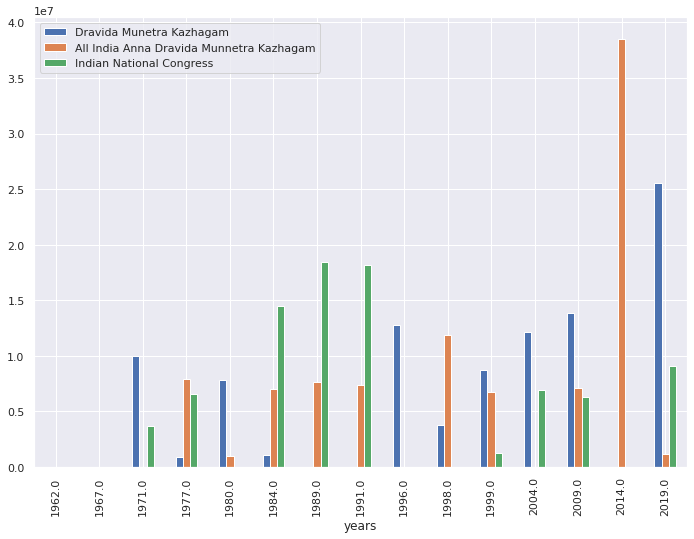

In [76]:
df_voters.plot(x='years',y=['Dravida Munetra Kazhagam','All India Anna Dravida Munnetra Kazhagam','Indian National Congress'],kind='bar')

we can see in 2014 DMK lost Deposit and 2019 DMK constituency vote incresed drastically and we can see the precence of congress in 1984, 1989 and 1991